# REGRESIÓN LINEAL
Esta notebook explora el flujo de ejecución de una regresión lineal y temas relacionados como son el descenso del gradiente, fórmula normal, overfitting, underfitting, regresión polinomial...

Primero se ejecutará una regresión lineal usando el paquete <b>SciKit-Learn</b>, luego se ejecutará la misma regresión pero usando la <b>fórmula normal</b> y dos <b>redes neuronales</b> simples (una programada desde cero, y otra usando <b>TensorFlow</b>). Los resultados así obtenidos se compararán entre ellos para determinar si son coherentes. En cada uno de los casos se explicarán los detalles pertinentes de cada método con el fin de dar claridad y arrojar luz sobre las generalidades de los mismos.

### Data Set
Usaré un DataSet creado aleatoriamente para este fin y siguiendo una clara tendencia lineal. Esto permite comprender mejor qué es lo que hace cada uno de los métodos aquí empleados y permite saber de forma intuitiva si los resultados obtenidos son coherentes con los datos, lo cual permite experimentar y entrenar la "intuición".

In [1]:
# Importaciones básicas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
'''La muestra consta de puntos generados aleatoriamente con ruido distribuido uniformemente.
   Intencionadamente siguen una tendencia lineal con pendiente m=2. Esto permitirá comprobar
   si la aproximación de los modelos es apropiada.
   Supondré que la variable independiente es una variable temporal (medida en dias), mientras
   que la variable dependiente (a predecir) es el costo del kW-h de electricidad en dólares.'''

tamano_muestra = 100
X = 100*np.random.random(tamano_muestra)   # "Matriz" de muestras
ruido = 60*np.random.random(tamano_muestra)   # Ruido aleatorio
intercepto = np.random.randint(10, 50, tamano_muestra)   # Aleatoriedad adicional
Y = 2*X + intercepto + ruido   # "Matriz" objetivo

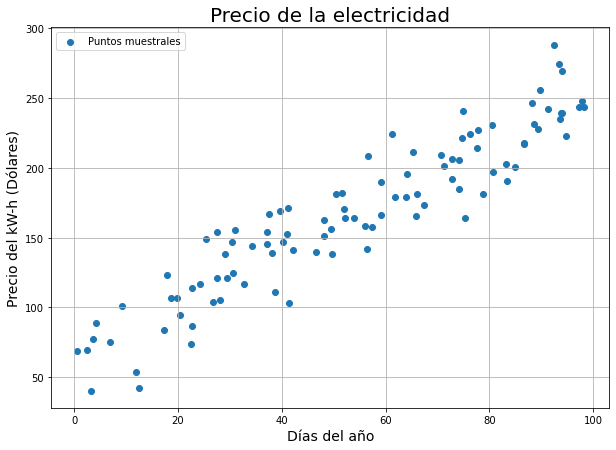

In [3]:
# Gráfica de los datos muestrales

plt.figure(figsize=(10, 7))
plt.scatter(X, Y, label='Puntos muestrales')
plt.grid()
plt.title('Precio de la electricidad', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

In [4]:
'''Para validar el modelo, dividiré el DataSet en un Training set (conjunto de entrenamiento) en el cual entrenaré
   el modelo, y un Test set (conjunto de prueba) en el cual evaluaré el modelo. El tamaño del Training set está
   dado por el valor de la variable "ratio".'''

ratio = 0.7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=ratio, random_state=1)

In [5]:
'''Crearé un modelo de regresión lineal instanciando la clase "LinearRegression" (Se instancia
   usando los hiperparámetros del modelo), la cual está dentro del módulo "linear_model" del
   paquete SciKit-Learn.'''

modelo_1 = LinearRegression(fit_intercept=True)   # Modelo de regresión lineal

# El entrenamiento se hace usando el método "fit()" del modelo
modelo_1.fit(X_train[: , None], Y_train);

Una vez que hemos entrenado el modelo, podemos hacer predicciones. Aplicaré el modelo sobre el Test Set para comprobar su pertinencia.

In [6]:
# Predicción realizada sobre X_test
Y_fit_1 = modelo_1.predict(X_test[: , None])

In [7]:
# Sumario la regresión y su desempeño

mensaje = (
    'Coeficiente de determinación: %(R_cuad)f\n' +
    'Pendiente de la regresión: %(pendiente)f\n' +
    'Intercepto: %(intercepto)f'
)

resultados_1 = {
    'R_cuad': round(  modelo_1.score(X_test[:, None], Y_test), 5  ),
    'pendiente': round(  modelo_1.coef_[0], 5  ),
    'intercepto': round(  modelo_1.intercept_, 5  ),
}

print(mensaje % resultados_1)
print('<===========================================>')

Coeficiente de determinación: 0.832910
Pendiente de la regresión: 1.908840
Intercepto: 65.000350
<===========================================>


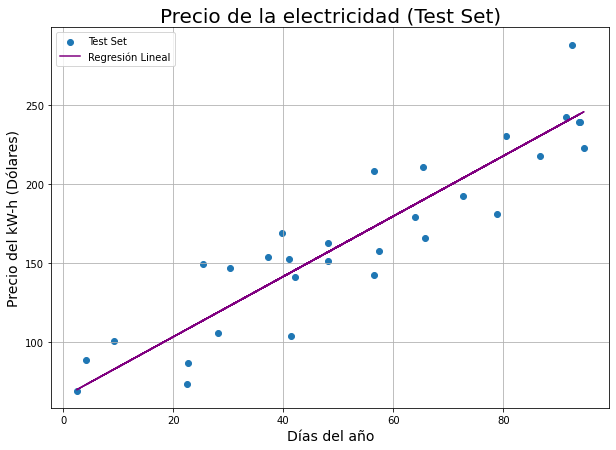

In [8]:
# Ajuste de la regresión al conjunto de prueba (Test Set)

plt.figure(figsize=(10, 7))
plt.scatter(X_test, Y_test, label='Test Set')
plt.plot(X_test, Y_fit_1, label='Regresión Lineal', color='purple')
plt.grid()
plt.title('Precio de la electricidad (Test Set)', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

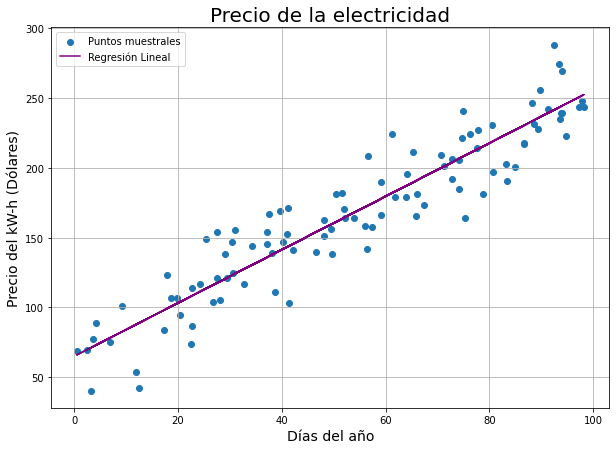

In [9]:
# Gráfica de los datos (todos) y la aproximación (regresión)

plt.figure(figsize=(10, 7))
plt.scatter(X, Y, label='Puntos muestrales')
plt.plot(X, modelo_1.predict(X[:, None]), label='Regresión Lineal', color='purple')
plt.grid()
plt.title('Precio de la electricidad', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

#### Validación cruzada:
La forma usada arriba para validar el modelo tiene el inconveniente de "desaprovechar" los datos del Test Set al momento de entrenar el modelo. Para palear este inconveniente y obtener una mejor aproximación del desempeño del modelo, usaré una validación cruzada para un número variable de particiones.

Los resultados obtenidos de la validación son una mejor aproximación del desempeño del modelo. Calcularé el mejor desempeño para un número variable de particiones. Tambien calcularé el desempeño para <b>7</b> y <b>10</b> particiones.

El mejor desempeño es 0.8662688746622697 para 2 particiones
El desempeño para 7 particiones es: 0.8255479078913411
El desempeño para 10 particiones es: 0.8025509891682533
<===========================================>


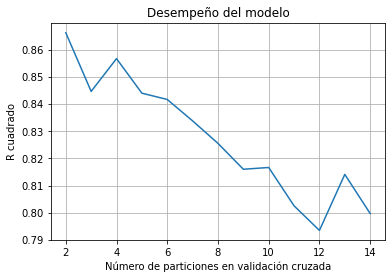

In [10]:
# Función que ejecuta la validación cruzada para varios valores de partición

def validacion_cruzada(features, target, k_fold):
    desempeno = []
    rango = range(2, k_fold)
    
    for i in rango:
        resultado = cross_val_score(modelo_1, features[:, None], target, cv=i).mean()
        desempeno.append(resultado)
     
    print('El mejor desempeño es {} para {} particiones'.format(max(desempeno), desempeno.index(max(desempeno))+2))
    print('El desempeño para 7 particiones es: {}'.format(desempeno[6]))
    print('El desempeño para 10 particiones es: {}'.format(desempeno[9]))
    print('<===========================================>')
    plt.plot(rango, desempeno)
    plt.grid()
    plt.title('Desempeño del modelo')
    plt.xlabel('Número de particiones en validación cruzada')
    plt.ylabel('R cuadrado')

# Invocación de la función arriba definida
desemp_valid_cruz = validacion_cruzada(X, Y, 15)

### Comparación de resultados usando la fórmula Normal
Validaremos los resultados arriba obtenidos (mediante SciKit-Learn) usando una implementación propia de la <b>fórmula normal</b> de regresión lineal.

In [11]:
# Definición de una función que implementa la fórmula normal
def Normal(X, Y):
    X = X.copy()
    X_arr = np.concatenate((np.ones(len(X))[None, :], X[None, :]), axis=0) 
    theta = np.linalg.inv(X_arr.dot(X_arr.T)).dot(X_arr).dot(Y)
    return theta

# Aplicación de la fórmula normal a los datos de entrenamiento
ensayo_normal = Normal(X_train, Y_train)

# Impresión de los resultados
mensaje_normal = (
    'Pendiente de la regresión: %(pendiente)f\n' +
    'Intercepto: %(intercepto)f'
)

resultados_normal = {
    'pendiente': round(  ensayo_normal[1], 5  ),
    'intercepto': round(  ensayo_normal[0], 5  ),
}

print(mensaje_normal % resultados_normal)
print('<===========================================>')

Pendiente de la regresión: 1.908840
Intercepto: 65.000350
<===========================================>


Nótese que los resultados (pendiente e intercepto) arrojados por SciKit-Learn coinciden con los resultados obtenidos de forma directa mediante el uso de la fórmula Normal de la regresión lineal.

### Implementación de una Red Neuronal para la Regresión lineal
Ahora haré la misma tarea de regresión lineal, pero usando un enfoque de red neuronal (implementada <b>desde cero</b>). Después comprobaré este resultado usando otra red neuronal, pero esta vez haciendo uso del paquete <b>TensorFlow.<b/>

La arquitectura de la red neuronal es la siguiente:
<img src='red.png' style="width:300px; height:180px">

Crearé una clase de Python que representará una red neuronal simple. Esta clase tendrá 3 métodos (adicionles al constructor de la clase), los cuales son: "predecir", "error_cuad" y "entrenar".
    
Nótese que la neurona no tiene función de activación (siendo rigurosos, su función de activación es la función Identidad).

In [12]:
# Clase que representa la arquitectura y funcionalidad de la Red Neuronal (NN)

class Red_Neuronal:
    # Constructor de la clase. 
    def __init__(self, W=1, b=30):
        self.W = W
        self.b = b
    
    '''Método para hacer predicciones con la red neuronal. La única información que requiere (llamada X) es un 
       conjunto de datos sobre los cuales se desea hacer la predicción (el X_test u otro conjunto de datos)'''
    def predecir(self, X):
        return self.W*X + self.b
    
    '''Método que calcula el error cuadrático medio de una predicción hecha por la red neuronal. La única
       información que requiere es el conjunto sobre el cual se hace la predicción (por ejemplo, X_test) y
       sus valores correspondientes (por ejemplo, el Y_test)'''
    def error_cuad(self, X, Y):
        m = X.shape[1]
        Y_hat = self.predecir(X)        
        return (1/m)*np.sum(Y - Y_hat)**2
    
    '''Método que ejecuta el entrenamiento de la red neuronal. Ejecuta la retro-propagación (Back-Propagation)
       y el descenso del gradiente para para aproximar valores óptimos de W y b. Sus parámetros son "num_iter"
       (número de iteraciones; 200000 por defecto), "l_rate" (tasa de aprendizaje; 0.00001 por defecto), "X"
       (datos sobre los que se predice) y "Y" (valores correspondientes a los valores de X -target array-)'''
    def entrenar(self, X, Y, num_iter=200000, l_rate=0.00001):
        m = X.shape[1]        
        for i in range(num_iter):
            Y_hat = self.predecir(X)
            dW = (2/m)*(Y_hat - Y).dot(X.T)
            db = (2/m)*np.sum(Y_hat - Y)
            self.W -= l_rate*dW
            self.b -= l_rate*db

In [13]:
# Instanciar y entrenar la NN
modelo_2 = Red_Neuronal()
modelo_2.entrenar(X_train[None, :], Y_train[None, :])

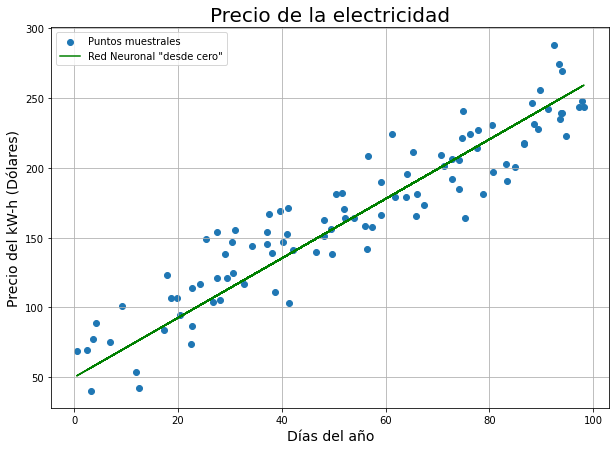

Pendiente de la regresión: 1.908840
Intercepto: 65.000350
<===========================================>


In [14]:
# Presentación gráfica de los resultados

plt.figure(figsize=(10, 7))
plt.scatter(X, Y, label='Puntos muestrales')
plt.plot(X, modelo_2.predecir(X[None, :])[0, :], label='Red Neuronal "desde cero"', color='green')
plt.grid()
plt.title('Precio de la electricidad', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

mensaje_NN = (
    'Pendiente de la regresión: %(pendiente)f\n' +
    'Intercepto: %(intercepto)f'
)

resultados_NN = {
    'pendiente': round(  modelo_2.W[0, 0], 5  ),
    'intercepto': round(  modelo_2.b, 5  ),
}

print(mensaje_normal % resultados_normal)
print('<===========================================>')

Se pueden sacar, por lo menos, dos conclusiones de los resultasdos anteriores: <b>1)</b> el enfoque de red neuronal aquí implementado funciona bien como método aplicable a la regresión lineal (aunque es más costoso computacionalmente) y <b>2)</b> la pendiente e intercepto hallados al entrenar la red neuronal coinciden con los hallados usando SciKit-Lear y la fórmula normal.

A continuación implementaré la misma red neuronal anterior, pero esta vez usando la librería <b>TensorFlow<b/>.

In [15]:
import tensorflow as tf

capa = tf.keras.layers.Dense(units=1, input_shape=[1])   # Definición de la única capa de la NN
modelo_3 = tf.keras.Sequential([capa])                   # Creación de la NN (apilado de capas)
modelo_3.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))   # Compilación del modelo

# Entrenamiento del modelo sobre los datos de entrenamiento
resultados_3 = modelo_3.fit(X_train, Y_train, epochs=2000, verbose=False)

3/3 [==============================] - 0s 2ms/step


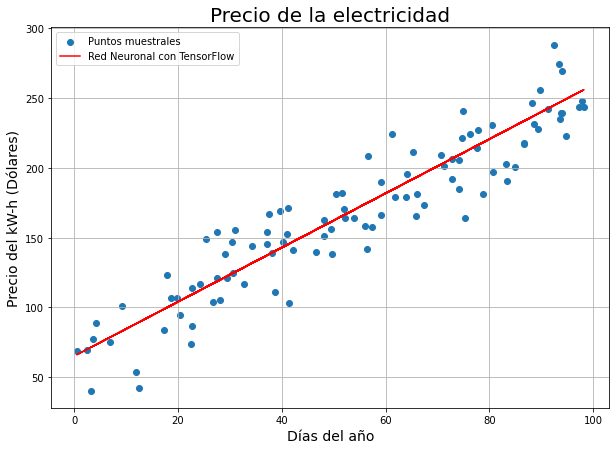

La pendiente e intercepto son, respectivamente: 1.9428938627243042 y 65.15364837646484
<===========================================>


In [16]:
# Usar el modelo para predecir (lo aplicaré a X_train solo para graficar a continuación)
Y_train3 = modelo_3.predict(X_train);

# Presentación gráfica de los resultados
plt.figure(figsize=(10, 7))
plt.scatter(X, Y, label='Puntos muestrales')
plt.plot(X_train, Y_train3, label='Red Neuronal con TensorFlow', color='red')
plt.grid()
plt.title('Precio de la electricidad', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

print('La pendiente e intercepto son, respectivamente: {} y {}'.format(capa.get_weights()[0][0][0], capa.get_weights()[1][0]))
print('<===========================================>')

# REGRESIÓN NO-LINEAL (polinomial)
La regresión polinomial es un caso particular de regresión lineal en el que cada potencia de la variable independiente es considerada una variable independiente en sí misma. Entonces, la regresión polinomial se transforma en una regresión lineal multivariable. Para dejar claro esto, haré la regresión polinomial <b>"manualmente"</b> y luego compararé estos resultados con una regresión polinomial hecha con <b>SciKit-Learn</b>.

In [17]:
muestra = 100   # Tamaño de la muestra
X_poly = 5*np.random.random(muestra)   
X_poly = np.sort(X_poly)
Y_poly = X_poly**3 - 8*X_poly**2 + 19*X_poly - 12 + 5*np.random.rand(muestra)

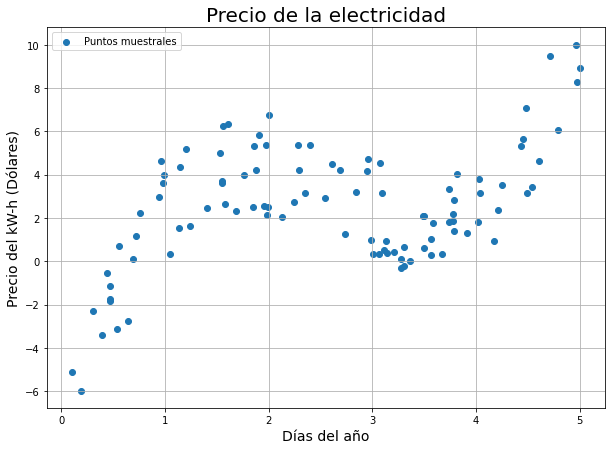

In [18]:
# Gráfica de los datos muestrales

plt.figure(figsize=(10, 7))
plt.scatter(X_poly, Y_poly, label='Puntos muestrales')
plt.grid()
plt.title('Precio de la electricidad', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

Aquí implementaré la <b>regresión polinomial</b> en bruto para entender su esencia

In [19]:
X_1 = X_poly.copy()[:, None]   # Primera potencia de la variable independiente X
X_2 = X_1**2                   # Segunda potencia de la variable independiente X
X_3 = X_1**3                   # Tercera potencia de la variable independiente X

X_polyArray1 = np.concatenate((X_1, X_2, X_3), axis=1)   # "Feature Array": organizar los datos

# Instanciar la clase "LinearRegression" que representa el modelo de regresión lineal
reg_poly1 = LinearRegression(fit_intercept=True)

# Ajustar el modelo a los datos
reg_poly1.fit(X_polyArray1, Y_poly);

coeficientes1 = reg_poly1.coef_
intercepto1 = reg_poly1.intercept_

# Los coeficientes polinomiales son...
print('Coeficientes polinomiales: ', coeficientes1)
print('Intercepto: ', intercepto1)
print('<===========================================>')

Coeficientes polinomiales:  [16.79036672 -7.269101    0.92366601]
Intercepto:  -7.858978970026451
<===========================================>


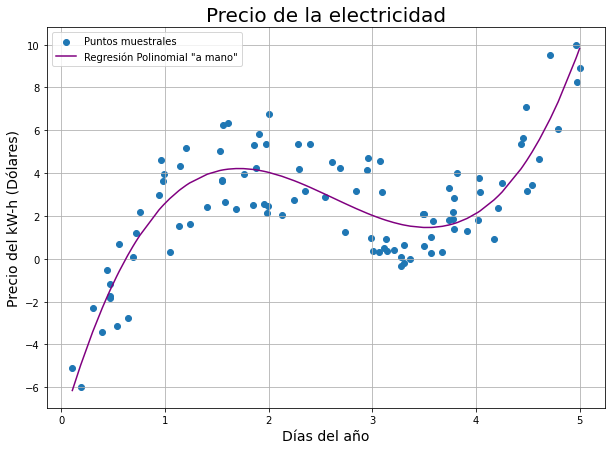

In [20]:
# ¿Qué tan bien se ajusta a los datos este resultado?...Veamos
aprox_poly1 = coeficientes1[0]*X_1 + coeficientes1[1]*X_2 + coeficientes1[2]*X_3 + intercepto1

# Gráfica de los datos muestrales
plt.figure(figsize=(10, 7))
plt.scatter(X_poly, Y_poly, label='Puntos muestrales')
plt.plot(X_poly, aprox_poly1.reshape(muestra), label='Regresión Polinomial "a mano"', color='purple')
plt.grid()
plt.title('Precio de la electricidad', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

Es claro que la aproximación arriba obtenida se ajusta bastante bien a los datos.

Ahora voy a usar <b>SciKit-Learn</b> para hacer la regresión polinomial. Es de esperarse que haya concordancia en los resultados de las dos regresiones

In [21]:
# Importación de la clase "PolynomialFeatures" del módulo "preprocessing" del paquete "SciKit-Learn"
from sklearn.preprocessing import PolynomialFeatures

In [22]:
transformacion = PolynomialFeatures(degree=3, include_bias=False)
X_polyArray2 = transformacion.fit_transform(X_poly[:, None])
reg_poly2 = LinearRegression(fit_intercept=True)
reg_poly2.fit(X_polyArray2, Y_poly)

# Los coeficientes polinomiales son...
print('Coeficientes polinomiales: ', reg_poly2.coef_)
print('Intercepto: ', reg_poly2.intercept_)
print('<===========================================>')

Coeficientes polinomiales:  [16.79036672 -7.269101    0.92366601]
Intercepto:  -7.858978970026596
<===========================================>


Puede verse la concordancia de estos resultados con los obtenidos sin usar "PolynomialFeatures".

Ahora veremos que tan bien se ajusta el modelo.

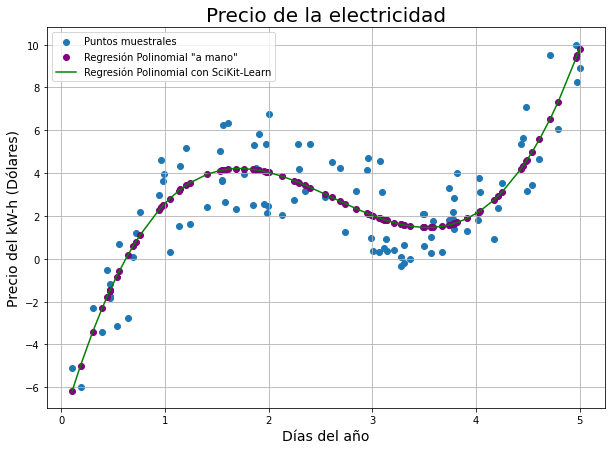

In [23]:
# ¿Qué tan bien se ajusta a los datos este resultado?...Veamos

aprox_poly2 = reg_poly2.predict(X_polyArray2)   # Predicción usando el modelo

# Gráfica de los datos muestrales
plt.figure(figsize=(10, 7))
plt.scatter(X_poly, Y_poly, label='Puntos muestrales')
plt.scatter(X_poly, aprox_poly1.reshape(muestra), label='Regresión Polinomial "a mano"', color='purple')
plt.plot(X_poly, aprox_poly2, label='Regresión Polinomial con SciKit-Learn', color='green')
plt.grid()
plt.title('Precio de la electricidad', fontsize=20, )
plt.xlabel('Días del año', fontsize=14)
plt.ylabel('Precio del kW-h (Dólares)', fontsize=14)
plt.legend()
plt.show();

Vemos que los resultados son idénticos, como era de esperarse.